In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.utils import shuffle
%matplotlib inline

(array([ 25.,  93., 127., 241., 193., 190.,  91.,  21.,  12.,   7.]),
 array([ 9. , 11.6, 14.2, 16.8, 19.4, 22. , 24.6, 27.2, 29.8, 32.4, 35. ]),
 <a list of 10 Patch objects>)

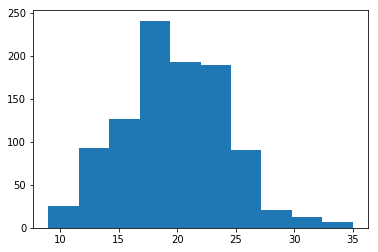

In [2]:
interval = 20 # on average, make a score every 20 seconds
n = 1000
samples = np.random.poisson(lam=interval,size=n)
plt.hist(samples)

In [3]:
game_time = 24 * 60 # 24 minutes per half game and 60 seconds in one minute
game_played = 0
interval = 20
intervals = []
points = []
two_point_percentage = 0.45
three_point_percentage = 0.37
game_style = 0.5 # less than 0.5 means that a team tends to shot more 2's, while higher than 0.5 means a team like 3's more
while game_time - game_played > 0:
    temp_pace = np.random.poisson(lam=interval,size=1)[0]
    intervals.append(temp_pace)
    game_played += temp_pace
    
    shot_selection = np.random.binomial(1,game_style,size=1)[0]
    if shot_selection == 0:
        point_ = np.random.binomial(1,two_point_percentage,size=1)[0] * 2
    elif shot_selection == 1:
        point_ = np.random.binomial(1,three_point_percentage,size=1)[0] * 3
    #print(shot_selection,point_)
    points.append(point_)

In [4]:
intervals = np.array(intervals)
points = np.array(points)
print('how often they take the shot (sec):',intervals,'\nwhat is the score each time',points,'\ntotal scores',np.sum(points))

how often they take the shot (sec): [29 26 24 18 17 19 21 22 17 14 21 28 19 16 18 19 16 24 25 19 19 21 20 27
 14 20 19 17 14 16 25 18 17 22 16 22 19 21 20 16 25 20 18 24 20 20 26 19
 23 13 19 19 21 20 20 15 26 31 18 22 24 13 22 20 29 15 12 21 18 15 21 11
 25] 
what is the score each time [0 0 0 0 0 2 0 0 2 2 2 2 3 0 0 3 0 0 0 0 0 0 0 2 0 3 0 0 0 2 0 0 0 3 3 3 0
 3 0 0 0 2 0 0 0 3 0 0 2 2 3 3 0 0 0 2 0 0 2 0 3 0 0 0 0 0 2 3 2 2 0 0 0] 
total scores 66


Looks good, and let's make it a function.

In [5]:
def simulate_a_half_game(interval=20,two_point_percentage=0.3,three_point_percentage=0.3,):
    game_time = 24 * 60 # 24 minutes per half game and 60 seconds in one minute
    game_played = 0
    interval = 20
    intervals = []
    points = []
    two_point_percentage = 0.45
    three_point_percentage = 0.37
    game_style = 0.5 # less than 0.5 means that a team tends to shot more 2's, while higher than 0.5 means a team like 3's more
    while game_time - game_played > 0:
        temp_pace = np.random.poisson(lam=interval,size=1)[0]
        intervals.append(temp_pace)
        game_played += temp_pace

        shot_selection = np.random.binomial(1,game_style,size=1)[0]
        if shot_selection == 0:
            point_ = np.random.binomial(1,two_point_percentage,size=1)[0] * 2
        elif shot_selection == 1:
            point_ = np.random.binomial(1,three_point_percentage,size=1)[0] * 3
        #print(shot_selection,point_)
        points.append(point_)
    return intervals,points

In [6]:
results = []
n = 1e6
for n in tqdm(range(int(n))):
    interval = np.random.uniform(11,35,size=1)[0]
    two_point_percentage = np.random.uniform(25,80,size=1)[0]
    three_point_percentage = np.random.uniform(10,60,size=1)[0]
    intervals,points=simulate_a_half_game(interval,two_point_percentage,three_point_percentage)
    #print(intervals,points)
    intervals_mean=np.mean(intervals)
    intervals_std = np.std(intervals)
    points = np.array(points)
    field_goal_percentage=np.sum(points!=0)/len(points)
    three_point_percentage_ = np.sum(points==3)/len(points)
    scores = np.sum(points)
    results.append([intervals_mean,intervals_std,
                   field_goal_percentage,
                   three_point_percentage_,
                   scores])

100%|███████████████████████████████| 1000000/1000000 [23:16<00:00, 716.23it/s]


In [7]:
df = pd.DataFrame(results,columns=['pace_mean',
                                  'pace_std',
                                  'field_goal',
                                  'three_point',
                                  'scores'])

In [8]:
df['labels'] = np.array(df['scores']>=100,dtype=int)

In [9]:
df.to_csv('nba simulation.csv',index=False)

In [10]:
df = pd.read_csv('nba simulation.csv')

In [21]:
ddf = df[df['labels']==1]

(array([   3.,   73.,  364., 1242., 2216., 2201., 1328.,  452.,  121.,
          17.]),
 array([17.83950617, 18.2129085 , 18.58631082, 18.95971314, 19.33311547,
        19.70651779, 20.07992012, 20.45332244, 20.82672476, 21.20012709,
        21.57352941]),
 <a list of 10 Patch objects>)

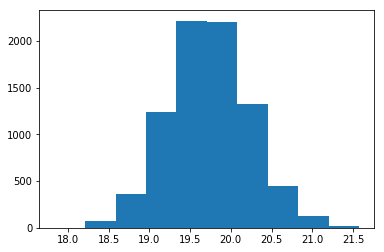

In [22]:
plt.hist(ddf['pace_mean'])

In [27]:
ddf['pace']=pd.qcut(ddf['pace_mean'].values,3,labels=['fast','median','slow'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
import seaborn as sns

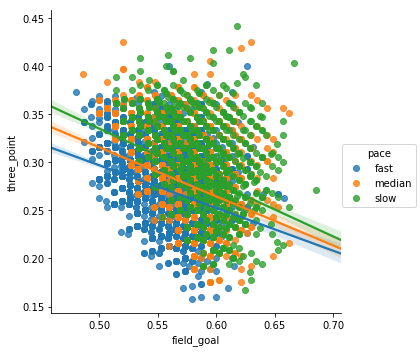

In [30]:
sns.lmplot(x='field_goal',y='three_point',hue='pace',data=ddf,fit_reg=True)

In [46]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedShuffleSplit,permutation_test_score
from imblearn.pipeline import Pipeline,make_pipeline
from imblearn.combine import SMOTEENN

rfc = RandomForestClassifier(n_estimators=50,random_state=12345)
svc = SVC(probability=True,random_state=12345)
log = LogisticRegressionCV(np.logspace(-3,3,7),max_iter=int(1e3),
                          random_state=12345)
bay = GaussianNB()
tre = DecisionTreeClassifier(random_state=12345)
cv = StratifiedShuffleSplit(n_splits=10,random_state=12345)
sam = SMOTEENN(random_state=12345)
clf = []
clf.append(('sampler',sam))
voter = VotingClassifier([('random forest',rfc),
                          ('SVC',svc),
                          ('logistic',log),
                          ('naive bayes',bay),
                          ('tree',tre)],voting='soft')
clf.append(('estimator',voter))
clf = make_pipeline(sam,voter)


In [47]:
size = len(ddf)
df_99 = df[df['labels']==0]
df_99 = df_99.sample(n=size,replace=False,axis=0)
df_99['pace']=pd.qcut(df_99['pace_mean'].values,3,labels=['fast','median','slow'])

In [48]:
data = pd.concat([ddf,df_99])

In [84]:
X = data[['pace_mean', 'pace_std', 'field_goal', 'three_point']].values
y = data['labels'].values
X,y = shuffle(X,y)
X = X.reshape(-1,4)
y = y.reshape(-1,1).ravel()
X.shape,y.shape

((16034, 4), (16034,))

In [86]:
from sklearn import metrics

scores = []
for train,test in cv.split(X,y):
    voter.fit(X[train],y[train],)
    score_ = metrics.roc_auc_score(y[test],clf.predict_proba(X[test])[:,-1])
    sen = metrics.precision_score(y[test],clf.predict(X[test]))
    sel = metrics.recall_score(y[test],clf.predict(X[test]))
    print(metrics.classification_report(y[test],clf.predict(X[test])))
    scores.append([score_,sen,sel])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       1.00      0.99      1.00       802
          1       0.99      1.00      1.00       802

avg / total       1.00      1.00      1.00      1604



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       1.00      0.99      1.00       802
          1       0.99      1.00      1.00       802

avg / total       1.00      1.00      1.00      1604



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       802
          1       1.00      1.00      1.00       802

avg / total       1.00      1.00      1.00      1604



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       802
          1       1.00      1.00      1.00       802

avg / total       1.00      1.00      1.00      1604



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       1.00      0.99      1.00       802
          1       0.99      1.00      1.00       802

avg / total       1.00      1.00      1.00      1604



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       1.00      0.99      1.00       802
          1       0.99      1.00      1.00       802

avg / total       1.00      1.00      1.00      1604



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       802
          1       1.00      1.00      1.00       802

avg / total       1.00      1.00      1.00      1604



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       1.00      0.99      1.00       802
          1       0.99      1.00      1.00       802

avg / total       1.00      1.00      1.00      1604



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       1.00      0.99      1.00       802
          1       0.99      1.00      1.00       802

avg / total       1.00      1.00      1.00      1604



C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       1.00      0.99      1.00       802
          1       0.99      1.00      1.00       802

avg / total       1.00      1.00      1.00      1604

